# Realistic Loan Approval Dataset | US & Canada


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
Loan_df = pd.read_csv("Loan_approval_data_2025.csv")

In [34]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [35]:
Loan_df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')

In [36]:
Loan_df.duplicated().sum()

np.int64(0)

In [37]:
Loan_df.shape

(50000, 20)

In [38]:
Loan_df.describe()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


In [39]:
Loan_df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [40]:
Loan_df.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [43]:
Loan_df.dtypes

customer_id                 object
age                          int64
occupation_status           object
years_employed             float64
annual_income                int64
credit_score                 int64
credit_history_years       float64
savings_assets               int64
current_debt                 int64
defaults_on_file             int64
delinquencies_last_2yrs      int64
derogatory_marks             int64
product_type                object
loan_intent                 object
loan_amount                  int64
interest_rate              float64
debt_to_income_ratio       float64
loan_to_income_ratio       float64
payment_to_income_ratio    float64
loan_status                  int64
dtype: object

In [93]:
# create a series with counts of numeric vs categorical columns
Loan_df= pd.Series([16,4], index=["Numeric","Categorical"])

Text(0.5, 1.0, 'Column Types in Dataset')

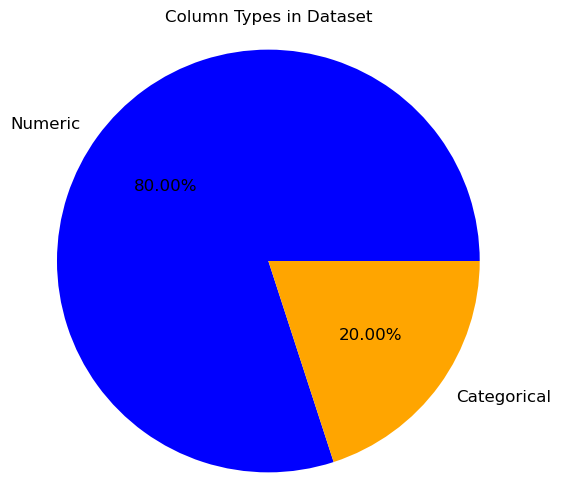

In [94]:
# create a pie chart for the column types 
Loan_df.plot.pie(
    labels = ["Numeric","Categorical"],
    autopct="%.2f%%",
    colors = ["blue","orange"],
    figsize=(6,6),
    fontsize = 12
)
plt.axis("equal") # used plt.axis to make it perfectly round 
plt.title("Column Types in Dataset") # create a title 
# we can finally clearly see that most of our data is numeric.

In [11]:
# Target distribution
Loan_df['loan_status'].value_counts()



loan_status
1    27523
0    22477
Name: count, dtype: int64

In [12]:
Loan_df['loan_status'].value_counts(normalize=True)* 100

loan_status
1    55.046
0    44.954
Name: proportion, dtype: float64

In [14]:
# Separate numeric and categorical columns
num_cols = Loan_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = Loan_df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:")
print(num_cols)
print("\nCategorical columns:")
print(cat_cols)

Numerical columns:
['age', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'savings_assets', 'current_debt', 'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status']

Categorical columns:
['customer_id', 'occupation_status', 'product_type', 'loan_intent']


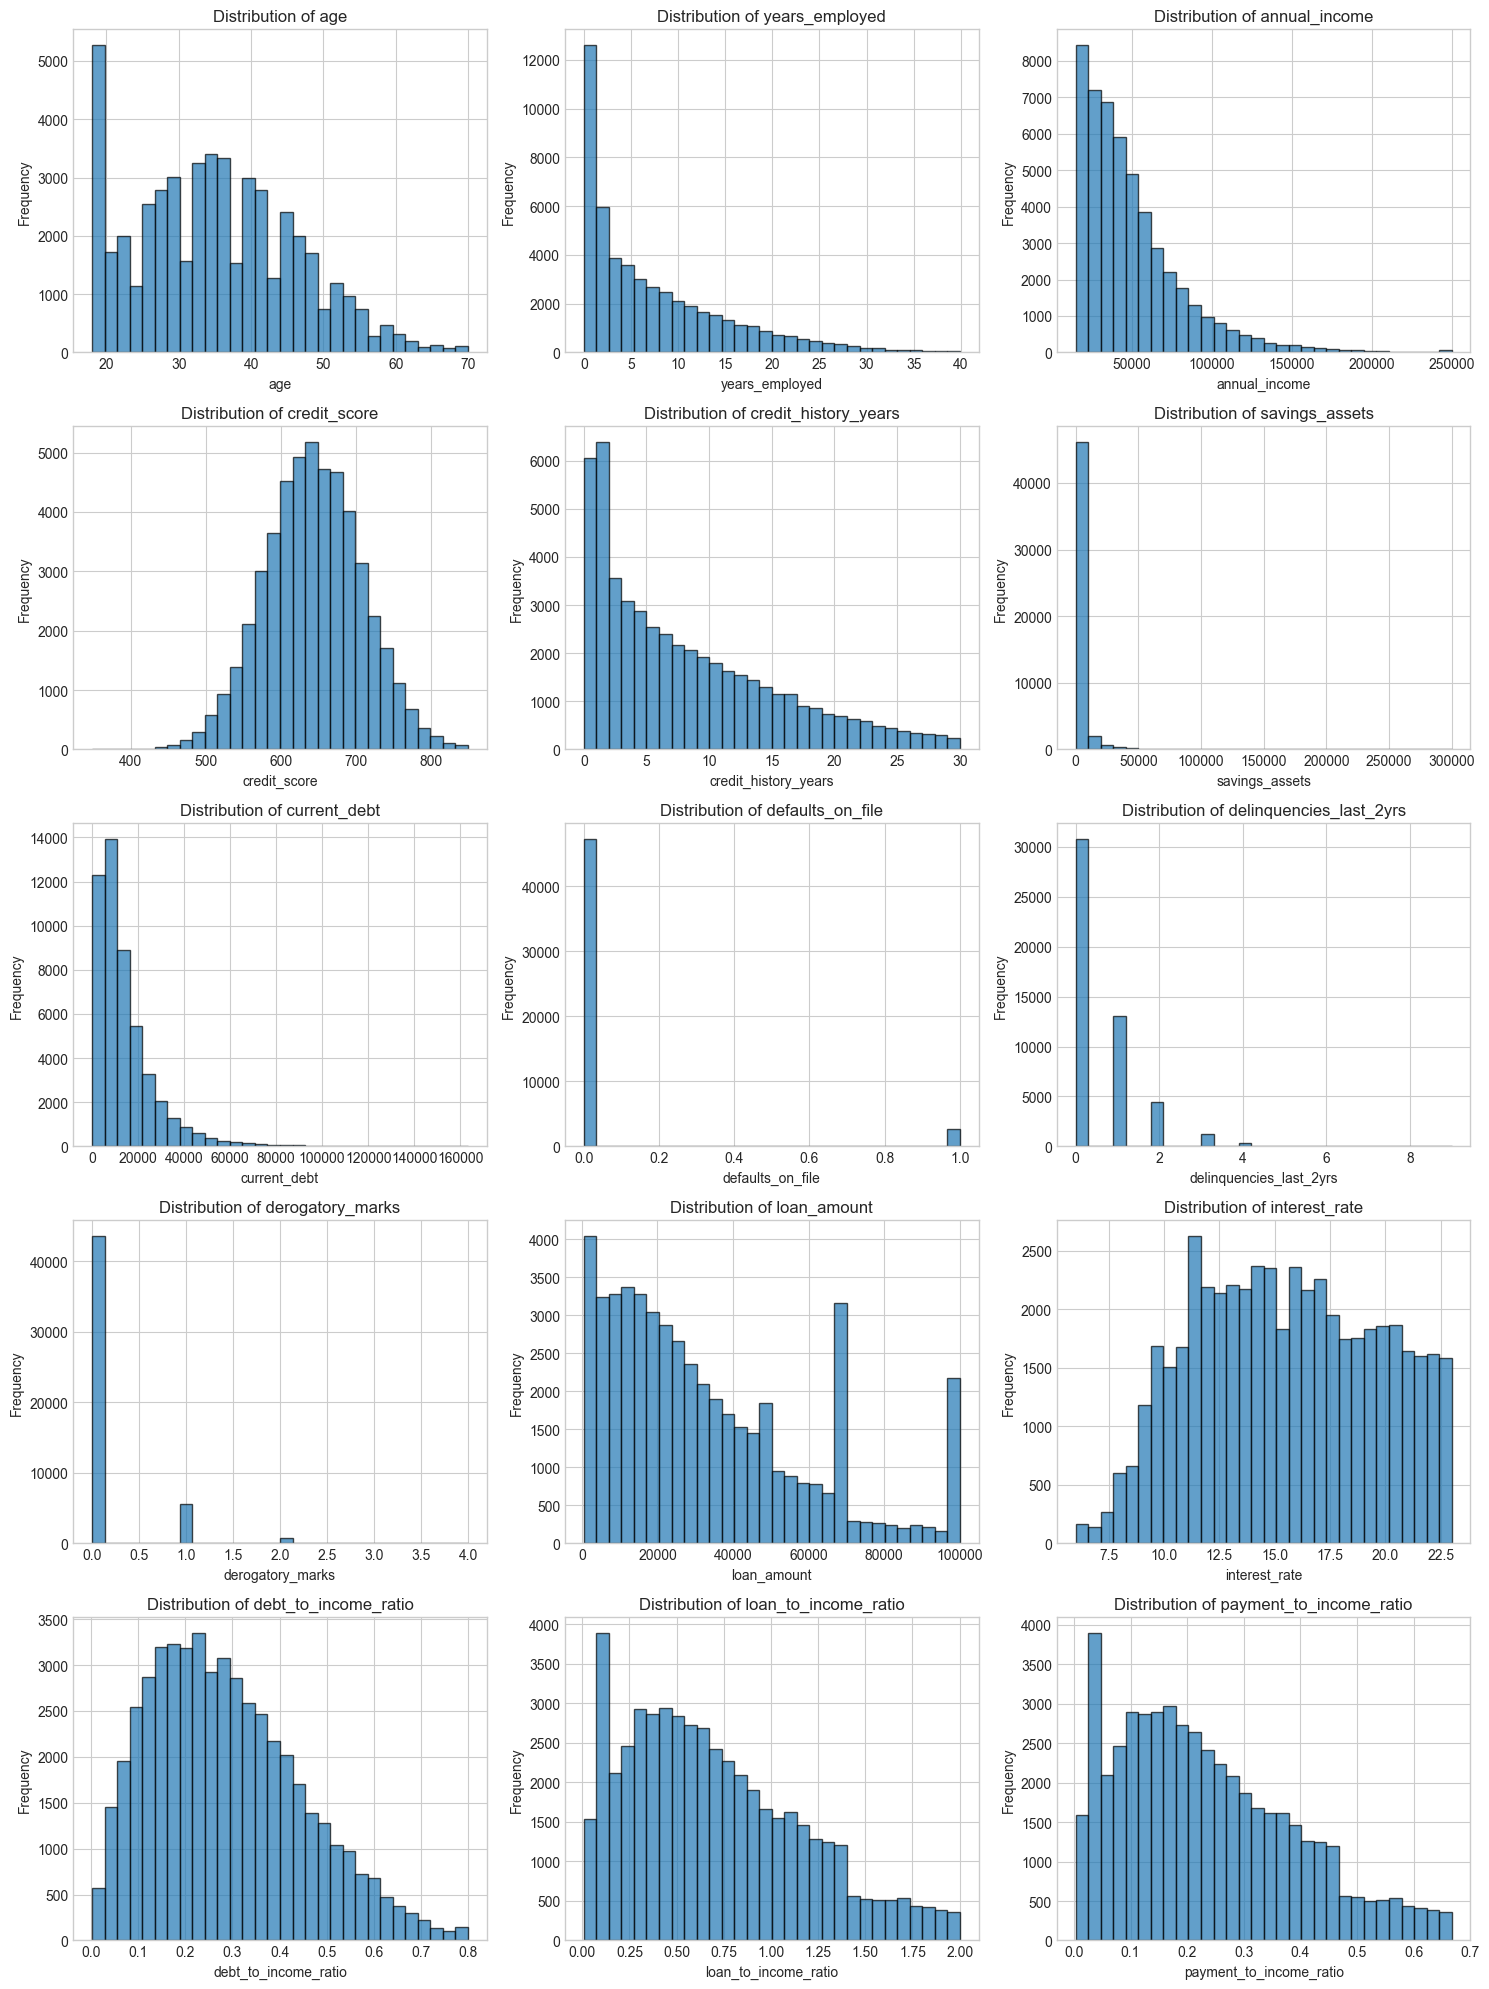

In [16]:
# Distribution of numerical features
numerical_cols = Loan_df.select_dtypes(include=['int64', 'float64']).columns.drop('loan_status')

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(Loan_df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

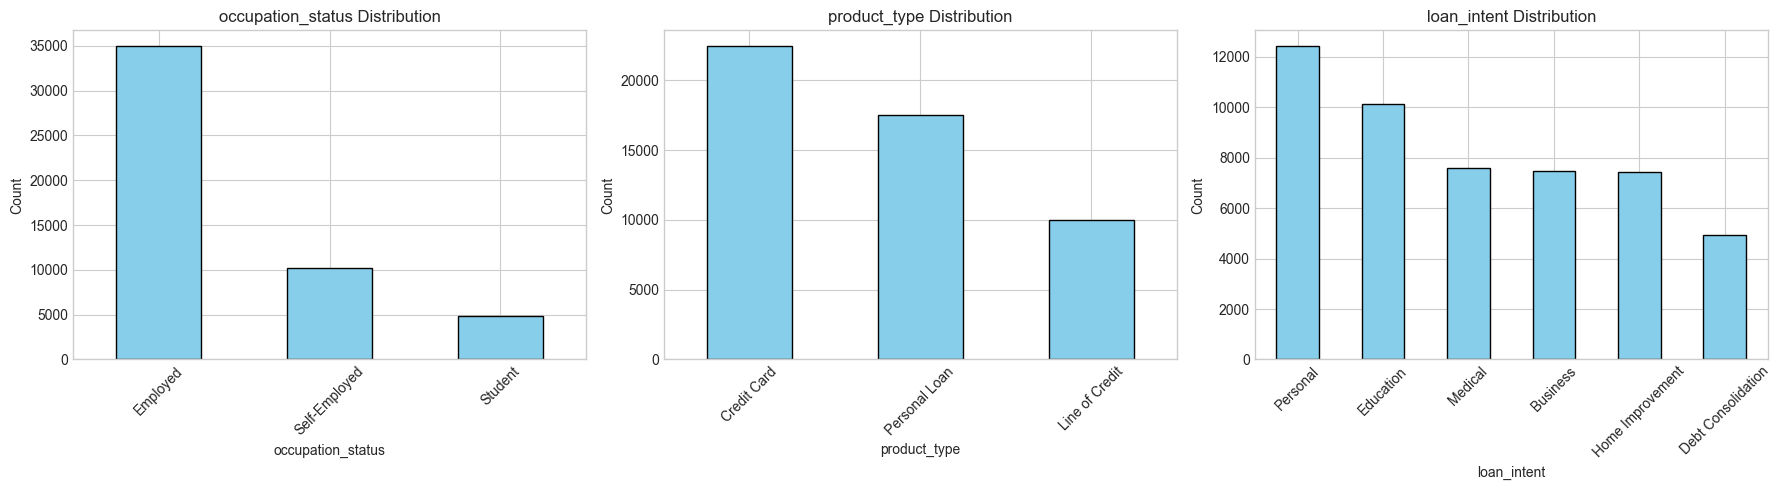

In [17]:
# Categorical columns
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    Loan_df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
print(len(categorical_cols))


3


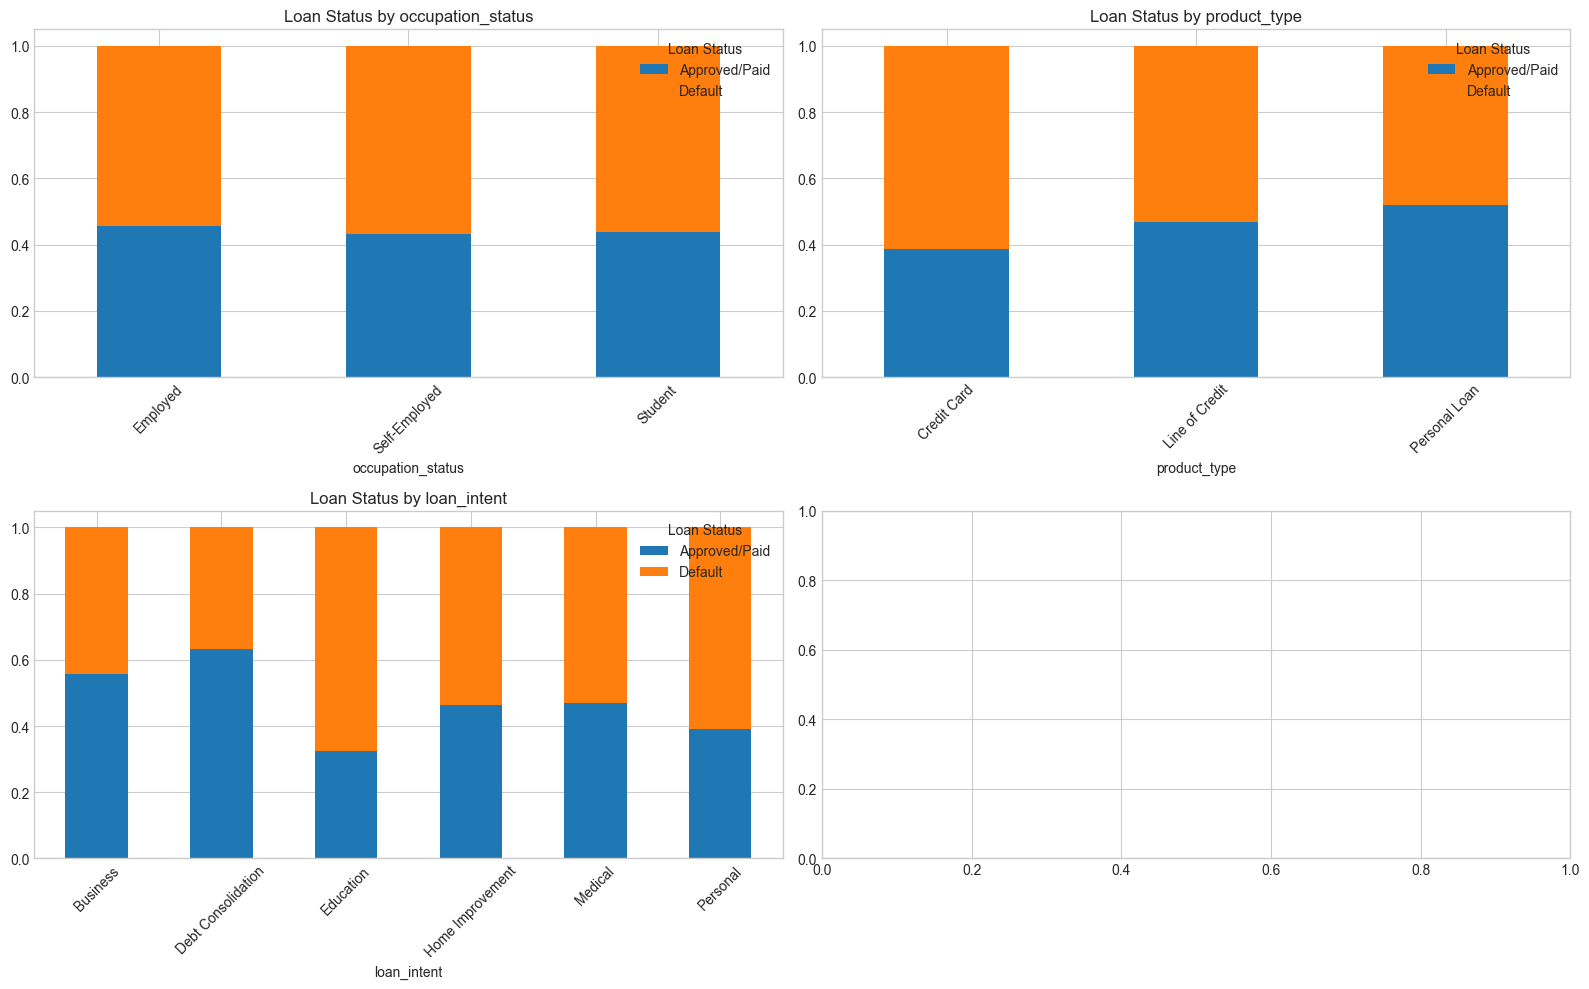

In [21]:
# Loan status by categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    pd.crosstab(Loan_df[col], Loan_df['loan_status'], normalize='index').plot(
        kind='bar', ax=axes[i], stacked=True
    )
    axes[i].set_title(f'Loan Status by {col}')
    axes[i].legend(['Approved/Paid', 'Default'], title='Loan Status')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [23]:
# Compute Pearson correlation matrix for numeric features
corr_matrix = Loan_df[num_cols].corr(method="pearson")

# Show top of the matrix
corr_matrix.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
age,1.000000,0.626840,0.264814,0.369271,0.636136,0.177699,0.179684,-0.063810,-0.101463,-0.098710,0.172352,-0.187963,-0.009043,-0.039339,-0.039345,0.311524
years_employed,0.626840,1.000000,0.235926,0.235266,0.404618,0.129377,0.161998,-0.041415,-0.063597,-0.065559,0.185206,-0.123444,-0.004341,0.018162,0.018173,0.218875
annual_income,0.264814,0.235926,1.000000,0.185058,0.164144,0.203323,0.698170,-0.038113,-0.051635,-0.044766,0.511129,-0.093371,-0.002630,-0.138318,-0.138306,0.158466
credit_score,0.369271,0.235266,0.185058,1.000000,0.236862,0.080091,0.126314,-0.188593,-0.284155,-0.267832,0.112019,-0.493183,-0.004806,-0.019248,-0.019241,0.496316
credit_history_years,0.636136,0.404618,0.164144,0.236862,1.000000,0.257595,0.113377,-0.045024,-0.063997,-0.064447,0.107280,-0.123866,-0.001180,-0.024801,-0.024807,0.277103


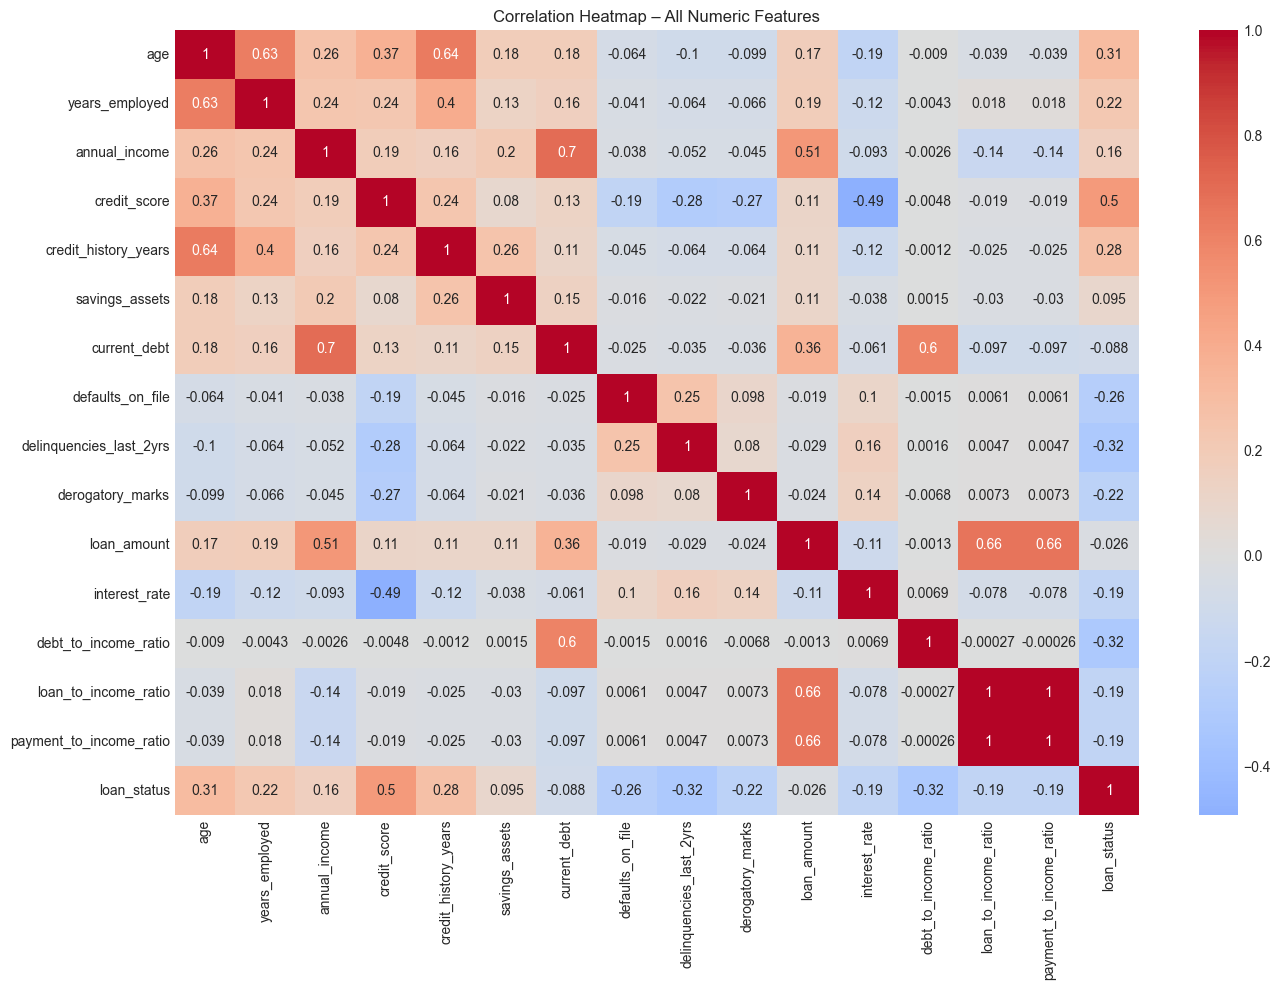


Correlation of numeric features with loan_status:

loan_status                1.000000
credit_score               0.496316
age                        0.311524
credit_history_years       0.277103
years_employed             0.218875
annual_income              0.158466
savings_assets             0.094789
loan_amount               -0.025987
current_debt              -0.088494
interest_rate             -0.185179
loan_to_income_ratio      -0.193252
payment_to_income_ratio   -0.193258
derogatory_marks          -0.224735
defaults_on_file          -0.263033
debt_to_income_ratio      -0.317363
delinquencies_last_2yrs   -0.318075
Name: loan_status, dtype: float64


In [25]:
# Heatmap of correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap – All Numeric Features")
plt.tight_layout()
plt.show()

# Top correlations with loan_status
# Correlation of each numeric feature with'loan_status'
loan_corr = corr_matrix['loan_status'].sort_values(ascending=False)
print("\nCorrelation of numeric features with loan_status:\n")
print(loan_corr)